In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns

from collections import OrderedDict

pd.options.display.max_columns = 50

In [2]:
airlines=pd.read_csv("content/airlines.csv",header=0,names=['AIRLINE','AIRLINE_NAME'])

In [3]:
flights=pd.read_csv("content/flights.csv")

C:\Users\reshm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
airports=pd.read_csv("content/airports.csv")

In [5]:
airports = airports.rename({'IATA_CODE':'ORIGIN_AIRPORT'}, axis=1)

In [6]:
airports

,ORIGIN_AIRPORT,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [7]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
flights = flights[flights['MONTH'] == 1]

In [9]:
flights.shape

(469968, 31)

In [10]:
import datetime,warnings
flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])

In [11]:
flights.drop('YEAR', inplace=True, axis=1)

In [12]:
flights.drop('MONTH', inplace=True, axis=1)

In [13]:
flights.drop( 'DAY', inplace=True, axis=1)  

In [14]:
def format_hour(chain):
    if pd.isnull(chain):
        return np.nan
    else:
        if chain == 2400: chain = 0
        chain = "{0:04d}".format(int(chain))
        hour = datetime.time(int(chain[0:2]), int(chain[2:4]))
        return hour

In [15]:
def combine_date_hour(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

In [16]:
def create_flight_time(df, col):    
    list = []
    for index, cols in df[['DATE', col]].iterrows():    
        if pd.isnull(cols[1]):
            list.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list.append(combine_date_hour(cols))
        else:
            cols[1] = format_hour(cols[1])
            list.append(combine_date_hour(cols))
    return pd.Series(list)

In [17]:
flights

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,6,B6,839,N658JB,JFK,BQN,2359,2359.0,0.0,18.0,17.0,221.0,200.0,179.0,1576,416.0,3.0,440,419.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469964,6,DL,1887,N855NW,SEA,DTW,2359,2359.0,0.0,16.0,15.0,252.0,239.0,209.0,1927,644.0,14.0,711,658.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469965,6,F9,300,N218FR,DEN,TPA,2359,2.0,3.0,35.0,37.0,192.0,212.0,168.0,1506,525.0,9.0,511,534.0,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0,2015-01-31
469966,6,F9,422,N954FR,DEN,ATL,2359,2359.0,0.0,40.0,39.0,162.0,191.0,141.0,1199,500.0,10.0,441,510.0,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0,2015-01-31


In [18]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469968 entries, 0 to 469967
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DAY_OF_WEEK          469968 non-null  int64         
 1   AIRLINE              469968 non-null  object        
 2   FLIGHT_NUMBER        469968 non-null  int64         
 3   TAIL_NUMBER          467186 non-null  object        
 4   ORIGIN_AIRPORT       469968 non-null  object        
 5   DESTINATION_AIRPORT  469968 non-null  object        
 6   SCHEDULED_DEPARTURE  469968 non-null  int64         
 7   DEPARTURE_TIME       458311 non-null  float64       
 8   DEPARTURE_DELAY      458311 non-null  float64       
 9   TAXI_OUT             458092 non-null  float64       
 10  WHEELS_OFF           458092 non-null  float64       
 11  SCHEDULED_TIME       469968 non-null  float64       
 12  ELAPSED_TIME         457013 non-null  float64       
 13  AIR_TIME      

In [19]:
flights['SCHEDULED_DEPARTURE'] = create_flight_time(flights, 'SCHEDULED_DEPARTURE')
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(format_hour)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_hour)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].apply(format_hour)


In [20]:
flights

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,6,B6,839,N658JB,JFK,BQN,2015-01-31 23:59:00,23:59:00,0.0,18.0,17.0,221.0,200.0,179.0,1576,416.0,3.0,04:40:00,04:19:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469964,6,DL,1887,N855NW,SEA,DTW,2015-01-31 23:59:00,23:59:00,0.0,16.0,15.0,252.0,239.0,209.0,1927,644.0,14.0,07:11:00,06:58:00,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469965,6,F9,300,N218FR,DEN,TPA,2015-01-31 23:59:00,00:02:00,3.0,35.0,37.0,192.0,212.0,168.0,1506,525.0,9.0,05:11:00,05:34:00,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0,2015-01-31
469966,6,F9,422,N954FR,DEN,ATL,2015-01-31 23:59:00,23:59:00,0.0,40.0,39.0,162.0,191.0,141.0,1199,500.0,10.0,04:41:00,05:10:00,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0,2015-01-31


In [21]:
flights

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE
0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469963,6,B6,839,N658JB,JFK,BQN,2015-01-31 23:59:00,23:59:00,0.0,18.0,17.0,221.0,200.0,179.0,1576,416.0,3.0,04:40:00,04:19:00,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469964,6,DL,1887,N855NW,SEA,DTW,2015-01-31 23:59:00,23:59:00,0.0,16.0,15.0,252.0,239.0,209.0,1927,644.0,14.0,07:11:00,06:58:00,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-31
469965,6,F9,300,N218FR,DEN,TPA,2015-01-31 23:59:00,00:02:00,3.0,35.0,37.0,192.0,212.0,168.0,1506,525.0,9.0,05:11:00,05:34:00,23.0,0,0,NaN,21.0,0.0,2.0,0.0,0.0,2015-01-31
469966,6,F9,422,N954FR,DEN,ATL,2015-01-31 23:59:00,23:59:00,0.0,40.0,39.0,162.0,191.0,141.0,1199,500.0,10.0,04:41:00,05:10:00,29.0,0,0,NaN,29.0,0.0,0.0,0.0,0.0,2015-01-31


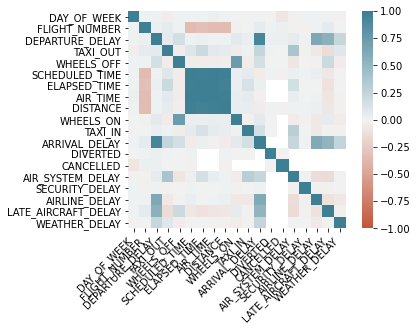

In [22]:
import seaborn as sns
corr  = flights.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [23]:
data = flights[['DAY_OF_WEEK','AIRLINE','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']]

In [24]:
data

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY
0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,-22.0
1,4,AA,2336,N3KUAA,LAX,PBI,2015-01-01 00:10:00,00:02:00,-8.0,-9.0
2,4,US,840,N171US,SFO,CLT,2015-01-01 00:20:00,00:18:00,-2.0,5.0
3,4,AA,258,N3HYAA,LAX,MIA,2015-01-01 00:20:00,00:15:00,-5.0,-9.0
4,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,-21.0
...,...,...,...,...,...,...,...,...,...,...
469963,6,B6,839,N658JB,JFK,BQN,2015-01-31 23:59:00,23:59:00,0.0,-21.0
469964,6,DL,1887,N855NW,SEA,DTW,2015-01-31 23:59:00,23:59:00,0.0,-13.0
469965,6,F9,300,N218FR,DEN,TPA,2015-01-31 23:59:00,00:02:00,3.0,23.0
469966,6,F9,422,N954FR,DEN,ATL,2015-01-31 23:59:00,23:59:00,0.0,29.0


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
airlines

,AIRLINE,AIRLINE_NAME
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [27]:
data = pd.merge(data, airlines, how ='inner', on ='AIRLINE')

In [28]:
data

,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY,AIRLINE_NAME
0,4,AS,98,N407AS,ANC,SEA,2015-01-01 00:05:00,23:54:00,-11.0,-22.0,Alaska Airlines Inc.
1,4,AS,135,N527AS,SEA,ANC,2015-01-01 00:25:00,00:24:00,-1.0,-21.0,Alaska Airlines Inc.
2,4,AS,108,N309AS,ANC,SEA,2015-01-01 00:45:00,00:41:00,-4.0,-14.0,Alaska Airlines Inc.
3,4,AS,122,N413AS,ANC,PDX,2015-01-01 00:50:00,00:46:00,-4.0,-18.0,Alaska Airlines Inc.
4,4,AS,130,N457AS,FAI,SEA,2015-01-01 01:15:00,01:07:00,-8.0,-3.0,Alaska Airlines Inc.
...,...,...,...,...,...,...,...,...,...,...,...
469963,6,VX,942,N640VA,SFO,LAX,2015-01-31 19:20:00,19:17:00,-3.0,-12.0,Virgin America
469964,6,VX,260,N843VA,SFO,LAS,2015-01-31 19:50:00,19:44:00,-6.0,-9.0,Virgin America
469965,6,VX,748,N623VA,SFO,SEA,2015-01-31 20:45:00,20:41:00,-4.0,-6.0,Virgin America
469966,6,VX,810,N855VA,SFO,PDX,2015-01-31 20:45:00,20:40:00,-5.0,-3.0,Virgin America


In [31]:
airport = airports[['ORIGIN_AIRPORT','AIRPORT']]

In [33]:
data = pd.merge(data, airport, how ='inner', on ='ORIGIN_AIRPORT')

In [37]:
data = data[['DAY_OF_WEEK','AIRLINE_NAME','FLIGHT_NUMBER','TAIL_NUMBER','AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']]

In [39]:
data = data.rename({'AIRPORT':'ORIGIN_AIRPORT'}, axis=1)

In [42]:
airports = airports.rename({'ORIGIN_AIRPORT':'DESTINATION_AIRPORT'}, axis=1)

In [45]:
airport = airports[['DESTINATION_AIRPORT','AIRPORT']]

In [47]:
data = pd.merge(data, airport, how ='inner', on ='DESTINATION_AIRPORT')

In [49]:
data = data[['DAY_OF_WEEK','AIRLINE_NAME','FLIGHT_NUMBER','TAIL_NUMBER','ORIGIN_AIRPORT','AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_DELAY']]

In [52]:
dict1 ={}

In [66]:
data.AIRLINE_NAME.unique()

array([ 0,  4,  8, 12, 13, 11,  9,  5,  1,  6,  7, 10,  3,  2])

In [55]:
dict1['AIRLINE']=list(data.AIRLINE_NAME.unique())

In [62]:
df = data[['AIRLINE_NAME']]
df = df.apply(LabelEncoder().fit_transform)

In [64]:
data[['AIRLINE_NAME']] = df[['AIRLINE_NAME']]

C:\Users\reshm\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [67]:
dict1['AIRLINE_NUMBER']=list(data.AIRLINE_NAME.unique())

In [70]:
dict1['ORIGIN_AIRPORT']=list(data.ORIGIN_AIRPORT.unique())

In [72]:
df = data[['ORIGIN_AIRPORT']]
df = df.apply(LabelEncoder().fit_transform)

In [74]:
data[['ORIGIN_AIRPORT']] = df[['ORIGIN_AIRPORT']]

C:\Users\reshm\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [75]:
dict1['ORIGIN_AIRPORT_NUMBER']=list(data.ORIGIN_AIRPORT.unique())

In [79]:
dict1['DESTINATION_AIRPORT']=list(data.AIRPORT.unique())

In [80]:
df = data[['AIRPORT']]
df = df.apply(LabelEncoder().fit_transform)

In [82]:
data[['AIRPORT']] = df[['AIRPORT']]

C:\Users\reshm\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [83]:
dict1['DESTINATION_AIRPORT_NUMBER']=list(data.AIRPORT.unique())

In [88]:
data.isna().values.any()

True

In [90]:
df = data.dropna()

In [92]:
df.isna().values.any()

False

In [93]:
df.columns

Index(['DAY_OF_WEEK', 'AIRLINE_NAME', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'ARRIVAL_DELAY'],
      dtype='object')

In [ ]:
x = df[['DAY_OF_WEEK', 'AIRLINE_NAME', 'FLIGHT_NUMBER','ORIGIN_AIRPORT', 'AIRPORT', 
    'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME','DEPARTURE_DELAY']].values

In [95]:
y = df[['ARRIVAL_DELAY']]

In [98]:
from sklearn.model_selection import train_test_split

In [111]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
model = DecisionTreeClassifier()

In [114]:
model.fit(xtrain,ytrain)

TypeError: invalid type promotion